<a href="https://colab.research.google.com/github/oroobyaseen/coursera.exercises/blob/gh-pages/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [256, 256]

train_path = '/content/drive/MyDrive/New folder (4)/train'
valid_path = '/content/drive/MyDrive/New folder (4)/val'

In [5]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [6]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/New folder (4)/train/*')

In [8]:
folders

['/content/drive/MyDrive/New folder (4)/train/Meningioma',
 '/content/drive/MyDrive/New folder (4)/train/Glioma',
 '/content/drive/MyDrive/New folder (4)/train/Pituitary tumor']

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [10]:
len(folders)

3

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New folder (4)/train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2456 images belonging to 3 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New folder (4)/val',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 616 images belonging to 3 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
77/77 [==============================] - 729s 9s/step - loss: 0.8657 - accuracy: 0.6710 - val_loss: 0.5378 - val_accuracy: 0.7711
Epoch 2/20
77/77 [==============================] - 75s 974ms/step - loss: 0.4311 - accuracy: 0.8176 - val_loss: 0.7734 - val_accuracy: 0.7435
Epoch 3/20
77/77 [==============================] - 75s 976ms/step - loss: 0.3840 - accuracy: 0.8465 - val_loss: 0.3101 - val_accuracy: 0.8571
Epoch 4/20
77/77 [==============================] - 75s 976ms/step - loss: 0.3071 - accuracy: 0.8738 - val_loss: 0.4379 - val_accuracy: 0.8263
Epoch 5/20
77/77 [==============================] - 75s 979ms/step - loss: 0.2753 - accuracy: 0.8913 - val_loss: 0.3097 - val_accuracy: 0.8766
Epoch 6/20
77/77 [==============================] - 76s 989ms/step - loss: 0.2446 - accuracy: 0.8986 - val_loss: 0.3344 - val_accuracy: 0.8734
Epoch 7/20
77/77 [==============================] - 75s 977ms/step - loss: 0.2269 - accuracy: 0.9104 - val_loss: 0.3518 - val_accuracy: 0.8588
E

In [20]:
import matplotlib.pyplot as plt

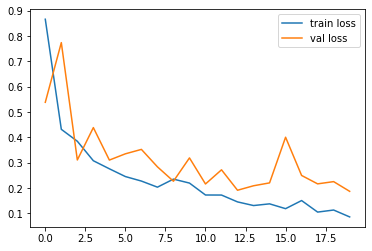

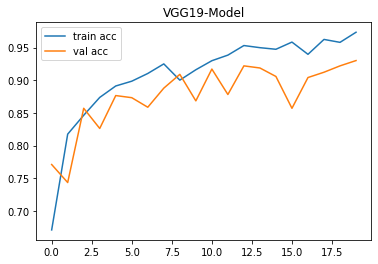

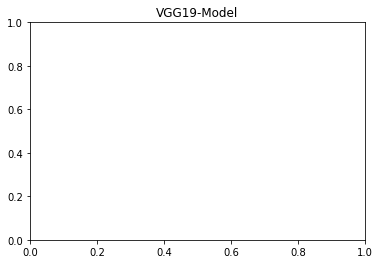

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.title('VGG19-Model')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
plt.title('VGG19-Model')
plt.show()

In [ ]:
# evaluatinn the model
model_evaluation = model.evaluate(test_data)

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')